In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
iso_data = np.genfromtxt('iso_sequence.dat')

In [3]:
age = iso_data[:,1]
print np.min(age)
print np.max(age)

6.6
10.1


In [4]:
stage = iso_data[:,-1]
print np.min(stage)
print np.max(stage)

0.0
8.0


In [5]:
M_init = iso_data[:,2]
print np.min(M_init)
print np.max(M_init)

0.09
62.82680511


In [6]:
#for each age, the largest M_init is the mass above which the stars are dead
age_arr = np.unique(age)
age[age == age_arr[0]];
M_init[age == age_arr[0]];

In [7]:
max_mass = np.zeros(len(age_arr))
for i in range(len(age_arr)):
    max_mass[i] = np.max(M_init[age == age_arr[i]])

/Users/loribeerman/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


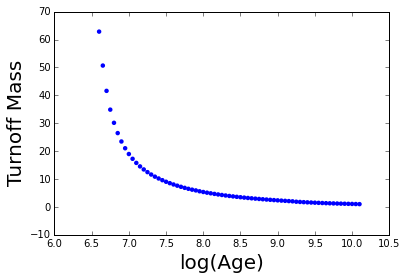

In [8]:
plt.scatter(age_arr, max_mass, edgecolors='None')
plt.xlabel('log(Age)', fontsize=20)
plt.ylabel('Turnoff Mass', fontsize=20)

In [9]:
#get interpolated function for log(age) - turnoff mass relation
from scipy import interpolate
age_turnoff_mass = interpolate.interp1d(age_arr, max_mass)

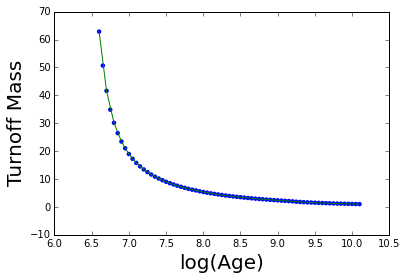

In [10]:
xnew = np.arange(6.6, 10.2, 0.1)
ynew = age_turnoff_mass(xnew)   # use interpolation function returned by `interp1d`
plt.scatter(age_arr, max_mass, edgecolors='None')
plt.plot(xnew, ynew, '-', color='g')
plt.xlabel('log(Age)', fontsize=20)
plt.ylabel('Turnoff Mass', fontsize=20)

In [11]:
age_turnoff_mass(6.63)

array(55.52609253000004)

In [12]:
def mass_frac(M_low, M_up):
    '''fraction of mass contained in stars with mass between M_low and M_up, for Salpeter IMF (0.1 - 120 Msun)'''
    return (0.17 / 0.35) * (M_low**(-0.35) - M_up**(-0.35))

In [13]:
def num_frac(M_low, M_up):
    '''fraction of stars that have mass between M_low and M_up for Salpeter IMF (0.1 - 120 Msun)'''
    return (0.06 / 1.35) * (M_low**(-1.35) - M_up**(-1.35))
num_frac(0.1, 120)

0.994917842441694

In [14]:
M_lim_low = 0.1
M_lim_up = 120.
mass_frac(M_lim_low, M_lim_up)
mass_frac(40,120)

0.04263323874869304

In [15]:
def BH_mass(M_clust, M_low, M_up):
    '''calculate mass in BH for stars greater than 40 Msun that have died'''
    BH_mass_frac = (0.5 * 0.17 / 0.35) * (M_low**(-0.35) - M_up**(-0.35))    #fraction of initial cluster mass contained in BH
    M_BH = BH_mass_frac * M_clust
    return M_BH

def NS_mass(M_clust, M_low, M_up):
    '''calculate mass in NS for stars between 8 and 40 Msun that have died'''
    #Renzini and Ciotti 93:  M_NS = 1.4 * N_NS
    #fraction of initial cluster mass contained in NS
    NS_mass_frac = (1.4 * 0.17 / 1.35) * (M_low**(-1.35) - M_up**(-1.35)) 
    M_NS = NS_mass_frac * M_clust
    return M_NS

def WD_mass(M_clust, M_low, M_up):
    '''calculate mass in WD for stars greater than 8 Msun that have died'''
    WD_mass_frac = (0.0374 * (M_low**(-0.35) - M_up**(-0.35))) + (0.0604 * (M_low**(-1.35) - M_up**(-1.35)))    #fraction of initial cluster mass contained in WD
    M_WD = WD_mass_frac * M_clust
    return M_WD


In [16]:
mass_frac(40, 120)

0.04263323874869304

In [17]:
Mcl = 1000000000
BH_mass(Mcl, 40, 120)/Mcl


0.02131661937434652

In [18]:
mass_frac(8, 40)

0.1010296205508703

In [19]:
NS_mass(Mcl, 8, 40)/Mcl

0.009431300122928756

In [20]:
def remnant_mass(M_clust, M_TO, M_lim_up):
    '''adds up all remnant masses based on turnoff mass'''
    if  M_TO > 40:
        M_R = BH_mass(M_clust, M_TO, M_lim_up)
    elif M_TO > 8:
        M_R = BH_mass(M_clust, 40, M_lim_up) + NS_mass(M_clust, M_TO, 40)
    else:
        M_R = BH_mass(M_clust, 40, M_lim_up) + NS_mass(M_clust, 8, 40) + WD_mass(M_clust, M_TO, 8)
    return M_R

In [21]:
def MS_mass(M_clust, M_lim_low, M_TO):
    '''calculates mass left in MS stars'''
    MS_mass_frac = mass_frac(M_lim_low, M_TO)    #fraction of initial mass still on MS
    M_MS = MS_mass_frac * M_clust
    return M_MS

In [22]:
remnant_mass(Mcl, 0.8, M_lim_up)/Mcl    #this is 15% in Conroy for 13 Gyr cluster

0.13110948481203172

In [23]:
MS_mass(Mcl, M_lim_low, 0.8)/Mcl        #this is 45% in Conroy for 13 Gyr cluster

0.5622094769149423

In [24]:
#read in cluster data
clust_data = np.genfromtxt('clust_results709.txt')

ap_id = clust_data[:,0].astype(int)
cat = np.genfromtxt('clust_results709.txt', usecols=(4), dtype=None)
best = np.genfromtxt('clust_results709.txt', usecols=(5), dtype=None)
int_age = clust_data[:,6]
int_mass = clust_data[:,9]
int_av = clust_data[:,12]
cmd_age = clust_data[:,15]
cmd_mass = clust_data[:,18]
cmd_av = clust_data[:,21]
C11_age_gyr = clust_data[:,24]
C11_mass = clust_data[:,25]
C11_EBV = clust_data[:,26]
C11_Z = clust_data[:,27]

C11_age = np.log10(C11_age_gyr * 1e9)
C11_av = C11_EBV * 3.1

M = np.where(best == 'M')
I = np.where(best == 'I')
O = np.where(best == 'O')

/Users/loribeerman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10


In [25]:
#loop over each clust to get turnoff mass based on cmd age
M_TO = np.zeros(len(ap_id))
M_remnant = np.zeros(len(ap_id))
M_MS = np.zeros(len(ap_id))

for i in range(len(ap_id)):
    if cmd_age[i] > 0:
        M_TO[i] = age_turnoff_mass(cmd_age[i])
        M_remnant[i] = remnant_mass(10**cmd_mass[i], M_TO[i], M_lim_up)
        M_MS[i] = MS_mass(10**cmd_mass[i], M_lim_low, M_TO[i])
 
log_M_remnant = np.log10(M_remnant)
log_M_MS = np.log10(M_MS)


/Users/loribeerman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/loribeerman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


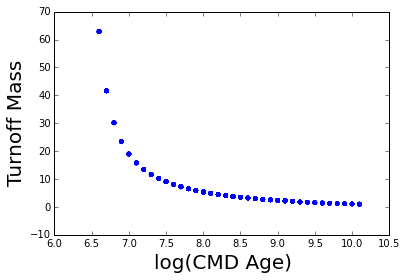

In [26]:
plt.scatter(cmd_age, M_TO, edgecolors='None')
plt.xlim([6,10.5])
plt.xlabel('log(CMD Age)', fontsize=20)
plt.ylabel('Turnoff Mass', fontsize=20)

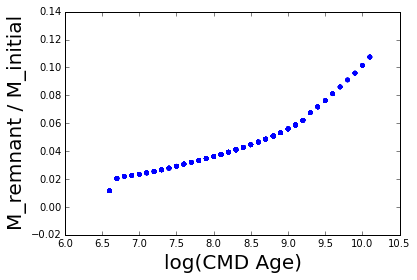

In [27]:
plt.scatter(cmd_age, M_remnant/10**cmd_mass, edgecolors='None')
plt.xlim([6,10.5])
plt.xlabel('log(CMD Age)', fontsize=20)
plt.ylabel('M_remnant / M_initial', fontsize=20)

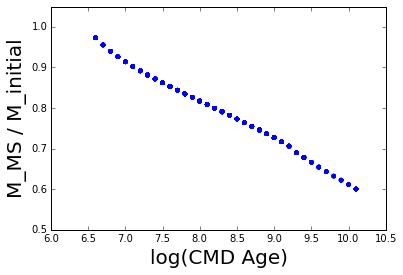

In [28]:
plt.scatter(cmd_age, M_MS/10**cmd_mass, edgecolors='None')
plt.xlim([6,10.5])
plt.ylim([0.5, 1.05])
plt.xlabel('log(CMD Age)', fontsize=20)
plt.ylabel('M_MS / M_initial', fontsize=20)

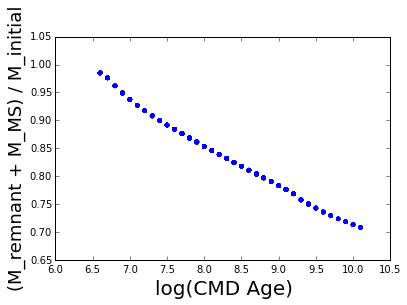

In [29]:
plt.scatter(cmd_age, (M_MS + M_remnant)/10**cmd_mass, edgecolors='None')
plt.xlim([6,10.5])
plt.ylim([0.65, 1.05])
plt.xlabel('log(CMD Age)', fontsize=20)
plt.ylabel('(M_remnant + M_MS) / M_initial', fontsize=18)

/Users/loribeerman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


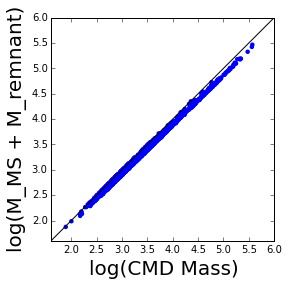

In [30]:
plt.scatter(cmd_mass, np.log10(M_MS + M_remnant), edgecolors='None')
l = np.arange(10)
plt.plot(l,l, c='black')
plt.xlim([1.6, 6])
plt.ylim([1.6, 6])
plt.axes().set_aspect('equal')
plt.xlabel('log(CMD Mass)', fontsize=20)
plt.ylabel('log(M_MS + M_remnant)', fontsize=20)
plt.show()

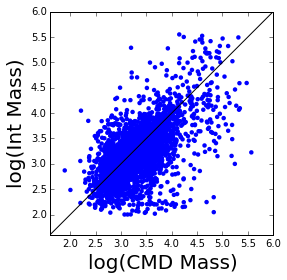

/Users/loribeerman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


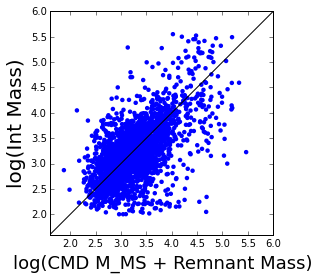

In [31]:
plt.scatter(cmd_mass, int_mass, edgecolors='None')
l = np.arange(10)
plt.plot(l,l, c='black')
plt.xlim([1.6, 6])
plt.ylim([1.6, 6])
plt.axes().set_aspect('equal')
plt.xlabel('log(CMD Mass)', fontsize=20)
plt.ylabel('log(Int Mass)', fontsize=20)
plt.show()

plt.scatter(np.log10(M_MS+M_remnant), int_mass, edgecolors='None')
l=np.arange(0,7)
plt.plot(l,l, c='black')
plt.xlim([1.6, 6])
plt.ylim([1.6, 6])
plt.axes().set_aspect('equal')
plt.xlabel('log(CMD M_MS + Remnant Mass)', fontsize=18)
plt.ylabel('log(Int Mass)', fontsize=20)
plt.show()